In [25]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/search?q="british"')
object_data = req.json()
object_info = object_data["info"]
object_records = object_data["records"]
record_count = object_info["record_count"]
print(f"There are {record_count} objects that have the word 'british' somewhere in the record")

There are 94947 objects that have the word 'british' somewhere in the record


In [2]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/search?q="indigenous"')
object_data = req.json()
object_info = object_data["info"]
object_records = object_data["records"]
record_count = object_info["record_count"]
print(f"There are {record_count} objects that have the words 'indigenous' somewhere in the record")

There are 380 objects that have the words 'indigenous' somewhere in the record


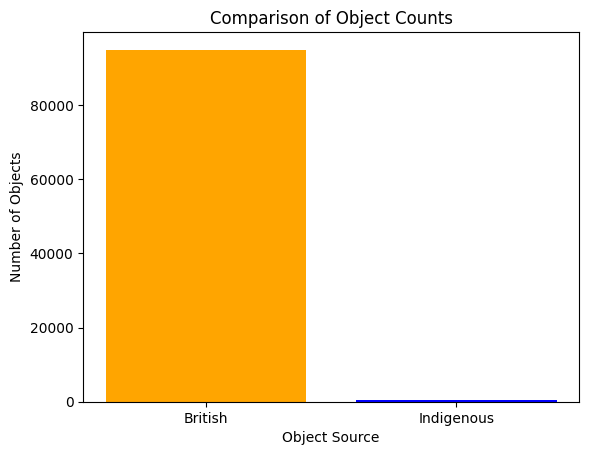

In [18]:
import requests
import matplotlib.pyplot as plt

# I make the API request for "British"
british_api_url = 'https://api.vam.ac.uk/v2/objects/search?q="british"'
british_api_response = requests.get(british_api_url)
british_api_data = british_api_response.json()
british_api_info = british_api_data["info"]
british_api_record_count = british_api_info["record_count"]

# I make the API request for "Indigenous"
indigenous_api_url = 'https://api.vam.ac.uk/v2/objects/search?q="indigenous"'
indigenous_api_response = requests.get(indigenous_api_url)
indigenous_api_data = indigenous_api_response.json()
indigenous_api_info = indigenous_api_data["info"]
indigenous_api_record_count = indigenous_api_info["record_count"]

# I create a bar chart to compare the two counts
labels = ['British', 'Indigenous']
counts = [british_api_record_count, indigenous_api_record_count]

plt.bar(labels, counts, color=['orange', 'blue'])
plt.title('Comparison of Object Counts')
plt.xlabel('Object Source')
plt.ylabel('Number of Objects')
plt.show()


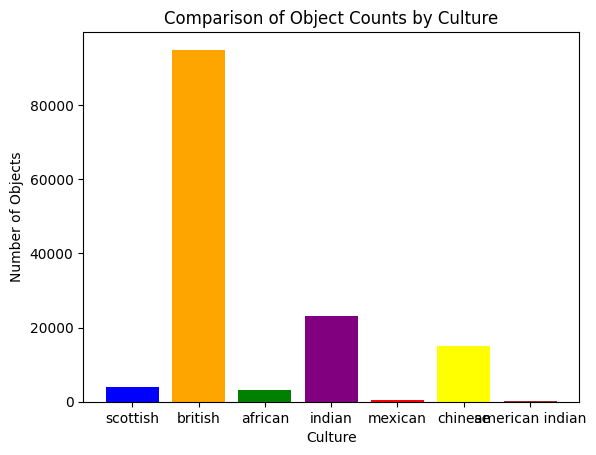

In [54]:
import requests
import matplotlib.pyplot as plt

# i define the cultures you want to compare
cultures_to_compare = ['scottish', 'british', 'african', 'indian', 'mexican', 'chinese', 'american indian']

# Initialize a dictionary to store the counts for each culture
culture_counts = {culture: 0 for culture in cultures_to_compare}

# Loop through each culture and fetch the count from the V&A API
for culture in cultures_to_compare:
    # Make a request to the API
    api_url = f'https://api.vam.ac.uk/v2/objects/search?q="{culture}"'
    response = requests.get(api_url)
    
    # Check if the request was successful
    if response.status_code == 200:
        object_data = response.json()
        object_info = object_data["info"]
        record_count = object_info["record_count"]
        culture_counts[culture] = record_count
    else:
        print(f"Failed to fetch data for {culture} culture. Status code: {response.status_code}")

# Create a bar chart to compare the counts
plt.bar(culture_counts.keys(), culture_counts.values(), color=['blue', 'orange', 'green', 'purple', 'red', 'yellow', 'brown'])
plt.title('Comparison of Object Counts by Culture')
plt.xlabel('Culture')
plt.ylabel('Number of Objects')
plt.show()


In [21]:
import requests

# I make the API request for "Indigenous" objects
indigenous_api_url = 'https://api.vam.ac.uk/v2/objects/search?q="indigenous"'
indigenous_api_response = requests.get(indigenous_api_url)
indigenous_api_data = indigenous_api_response.json()
indigenous_objects = indigenous_api_data.get("records", [])

# Create a dictionary to store the count for each collection
collection_counts = {}

# Count the number of objects for each collection
for obj in indigenous_objects:
    collection_name = obj.get("fields", {}).get("collection", "Unknown Collection")
    collection_counts[collection_name] = collection_counts.get(collection_name, 0) + 1

# Find the collection with the most indigenous objects
max_collection = max(collection_counts, key=collection_counts.get)
max_count = collection_counts[max_collection]

# Print the result
print(f"The collection with the most indigenous objects is '{max_collection}' with {max_count} objects.")

    


The collection with the most indigenous objects is 'Unknown Collection' with 15 objects.


In [25]:
import requests

# Make the API request for objects with "exotic" in the title
exotic_api_url = 'https://api.vam.ac.uk/v2/objects/search?q="exotic"'
exotic_api_response = requests.get(exotic_api_url)
exotic_api_data = exotic_api_response.json()
exotic_objects_count = exotic_api_data.get("info", {}).get("record_count", 0)

# Print the number of objects with "exotic" in the title
print(f"Number of objects with 'exotic' in the title: {exotic_objects_count}")


Number of objects with 'exotic' in the title: 2786


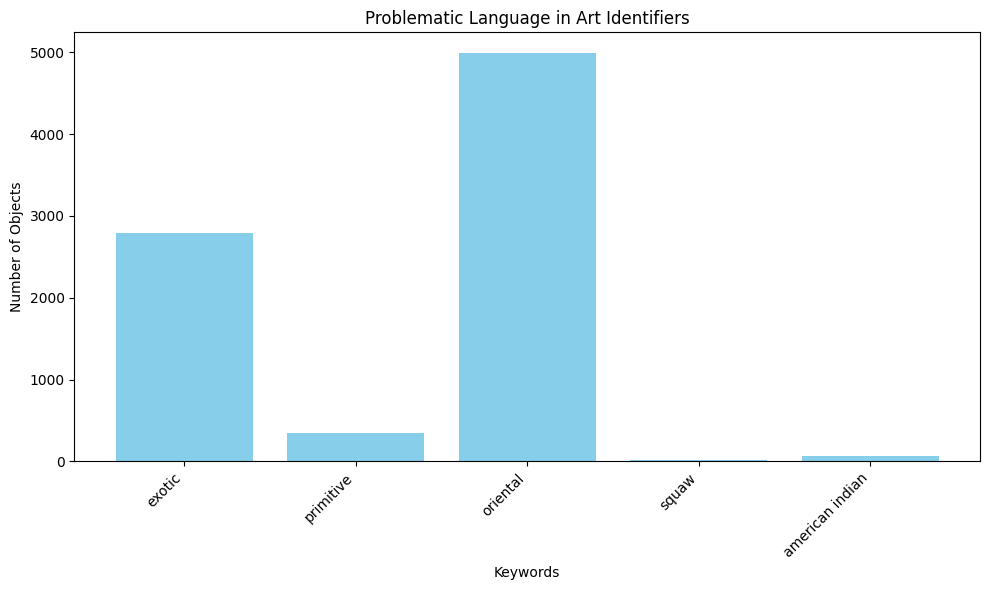

In [31]:
import requests
import matplotlib.pyplot as plt

# I list of words to search for in the title
search_keywords = ['exotic', 'primitive', 'oriental', 'squaw', 'american indian']

# Initialize a dictionary to store counts for each keyword
keyword_counts = {keyword: 0 for keyword in search_keywords}

# Make the API requests for each keyword
for keyword in search_keywords:
    api_url = f'https://api.vam.ac.uk/v2/objects/search?q="{keyword}"'
    api_response = requests.get(api_url)
    api_data = api_response.json()
    keyword_counts[keyword] = api_data.get("info", {}).get("record_count", 0)

# Extract data for visualization
keywords = list(keyword_counts.keys())
counts = list(keyword_counts.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(keywords, counts, color='skyblue')
plt.title('Problematic Language in Art Identifiers')
plt.xlabel('Keywords')
plt.ylabel('Number of Objects')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()


plt.show()
